# Fortnite数据分析

## 目录
- [简介](#intro)
- [I - 数据整理](#wrangling)
- [II - 探索性数据分析](#eda)
- [III - 结论](#conclusions)

<a id='intro'></a>
## 简介

绝地求生在国内火的一塌糊涂的时候，一款名叫Fortnite的游戏在国外刮起了堡垒旋风，这款同样为大逃杀玩法的沙盒类游戏，在绝地求生逐渐走低的形势下，堡垒之夜却夺得多项提名，众多明星主播转战堡垒！

>上天入地，盖楼修路，铺陷阱设弹床；  
想和太阳肩并肩，一发火箭就上天；    

毕竟小编也成有过梦想，所以也是下到了港服的Fortnite，努力积累了40把左右的数据，现在拿来分析一下，希望能分析出来跟吃鸡（获得第一名）最相（bu）关（zhun）的条件是什么！

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## 数据整理

>载入Fortnite数据，检查数据的质量和整洁度，然后整理和清理数据集，以便进行后续的清理工作。

In [2]:
#录入Fornite的CSV数据
Fortnite_data = pd.read_csv('Fortnite_data.csv')

In [3]:
#输出数据前几行，对数据集有个大致的了解
Fortnite_data.head()

,serial_number,knockout_number,assist-number,save_number,precision,hit_the_target,exact_strike,marching_course,material collection,material-using,afford damage,cause_damage,building-damage,grade,Total-score,Total-experience,teams number,match-time,competitor-name
0,1,4,1,0,0.33,69,19,4000,1325,670,554,815,3709,3,448.0,762.0,1,2018/5/14 11:37,Alvin
1,2,2,1,0,0.31,28,0,2000,733,110,292,268,7733,9,282.0,536.0,2,2018/5/17 17:48,Alvin
2,3,3,0,1,0.21,33,12,3000,1806,350,245,543,7727,8,291.0,597.0,4,2018/5/18 18:05,Alvin
3,4,2,0,3,0.05,6,0,3000,700,420,746,163,19008,3,NaN,NaN,4,2018/5/18 18:26,Alvin
4,5,1,4,1,0.12,32,7,3000,668,370,212,432,13108,4,358.0,734.0,4,2018/5/18 18:53,Alvin


### 观察数据
本数据集包含了从5月14日到5月30日的42把游戏数据，其中有小编本人的Solo记录（惨不忍睹:joy:），也有网上找的好友的组队记录（感谢朋友们的大力支持！:clap:）。该数据集中的缺失值被标记为NaN。数据列名的含义如下：  

	serial_number：         游戏场次编号  
    knockout_number：  本场淘汰人数  
    assist_number：        助攻数  
    save_number：          救起队友人数  
    precision：                 射击精度  
    hit_the_target：         命中  
    exact_strike：             精准打击  
    marching_course：     行进历程（m）
    material_collection：  材料已收集  
    material-using：         使用材料  
    afford_damage：        承受伤害  
    cause_damage：         玩家伤害  
    building-damage：     建筑伤害  
    total_score：               总分
    total_experience：      总经验
    teams_number：        参赛情况（1人为Solo，两人为Double，4人为team，3人参赛自动填充为4人）
    match_time：             游戏时间
    competitor_name：   该条记录的所有人
    
   ### 评估

In [4]:
#查看数据类型和数据有无缺失
Fortnite_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 19 columns):
serial_number          42 non-null int64
knockout_number        42 non-null int64
assist-number          42 non-null int64
save_number            42 non-null int64
precision              42 non-null float64
hit_the_target         42 non-null int64
exact_strike           42 non-null int64
marching_course        42 non-null int64
material collection    42 non-null int64
material-using         42 non-null int64
afford damage          42 non-null int64
cause_damage           42 non-null int64
building-damage        42 non-null int64
grade                  42 non-null int64
Total-score            20 non-null float64
Total-experience       20 non-null float64
teams number           42 non-null int64
match-time             42 non-null object
competitor-name        42 non-null object
dtypes: float64(3), int64(14), object(2)
memory usage: 6.3+ KB


In [5]:
#查看一下有无重复数据
Fortnite_data[Fortnite_data.duplicated()]

,serial_number,knockout_number,assist-number,save_number,precision,hit_the_target,exact_strike,marching_course,material collection,material-using,afford damage,cause_damage,building-damage,grade,Total-score,Total-experience,teams number,match-time,competitor-name


In [6]:
#查看数据的描述统计
Fortnite_data.describe()

,serial_number,knockout_number,assist-number,save_number,precision,hit_the_target,exact_strike,marching_course,material collection,material-using,afford damage,cause_damage,building-damage,grade,Total-score,Total-experience,teams number
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,20.000000,20.000000,42.000000
mean,21.500000,2.642857,1.261905,0.380952,0.246429,38.452381,6.976190,2576.142857,1092.785714,312.619048,350.047619,567.309524,9336.119048,6.000000,362.700000,676.350000,3.238095
std,12.267844,2.818246,1.415240,0.660834,0.168520,32.539809,8.529684,781.055339,617.643932,213.781967,160.616336,434.419966,6366.174673,4.928761,151.638802,274.785519,1.122052
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,481.000000,200.000000,0.000000,52.000000,0.000000,1755.000000,1.000000,84.000000,168.000000,1.000000
25%,11.250000,1.000000,0.000000,0.000000,0.172500,10.250000,2.000000,2000.000000,694.750000,162.500000,273.000000,262.750000,5780.000000,3.000000,277.750000,507.750000,2.000000
50%,21.500000,2.000000,1.000000,0.000000,0.240000,32.500000,3.500000,3000.000000,905.500000,260.000000,326.000000,513.000000,7819.000000,4.000000,328.500000,602.500000,4.000000
75%,31.750000,3.000000,2.000000,1.000000,0.305000,56.000000,10.250000,3000.000000,1453.750000,367.500000,403.000000,692.500000,10799.500000,7.750000,403.000000,775.250000,4.000000
max,42.000000,15.000000,5.000000,3.000000,1.000000,126.000000,39.000000,4000.000000,2728.000000,1060.000000,877.000000,1970.000000,32963.000000,18.000000,728.000000,1238.000000,4.000000


发现有一个一场淘汰15人的数据，可能有误，单独输出该条数据进行查看：

In [7]:
Fortnite_data[Fortnite_data['knockout_number']==15]

,serial_number,knockout_number,assist-number,save_number,precision,hit_the_target,exact_strike,marching_course,material collection,material-using,afford damage,cause_damage,building-damage,grade,Total-score,Total-experience,teams number,match-time,competitor-name
12,13,15,1,0,0.24,103,18,3000,1488,660,52,1970,8612,1,728.0,1238.0,1,2018/5/19 21:47,Wal-Mart


这条属于正常数据，沃尔玛同学这场异常生猛，沃尔玛一人杀了15个，一路高歌在吃鸡的道路上，且只有3000m的行进举例说明基本上没有跑毒的困扰，可以说天时地利了！

#### 质量

- Total-score和Total-experience是大写的，修改成跟其他的一样的小写
- 所有连字符（-和空格）全部修改成下划线
- Total-score和Total-experience有很多数据缺失
- serial_number全部转化成前面有两个0的字符串
- Total-score和Total-experience应该是整数而不是浮点数
- teams number应该是分类变量，而不是整数
- match-time应该是datetime而不是字符串
- 最后一列是提供数据的人，并不是竞争者姓名

#### 清洁度

- 将match-time列拆分成年月日列和小时列

### 清理

In [8]:
#复制一个备用df
Fortnite_clean = Fortnite_data.copy()

#### 列名修改

##### 定义
- 使用.replace函数和For循环把所有列名中的 ‘-’和 ‘ ’替换成 ‘_’  
- 使用.replace函数和For循环把所有列名中的大写转化为小写
- 最后一列是提供数据的人，并不是竞争者姓名

##### 代码

In [9]:
#所有的连字符都用下划线表示
Fortnite_clean.columns = [c.replace('-', '_') for c in Fortnite_clean.columns]
Fortnite_clean.columns = [c.replace(' ', '_') for c in Fortnite_clean.columns]
#大写转化成小写
Fortnite_clean.columns = [c.replace('T', 't') for c in Fortnite_clean.columns]

In [10]:
#最后一列是提供数据的人，并不是竞争者姓名
Fortnite_clean.rename(columns={'competitor_name': 'data_sources'}, inplace=True)

##### 测试

In [11]:
Fortnite_clean.head()

,serial_number,knockout_number,assist_number,save_number,precision,hit_the_target,exact_strike,marching_course,material_collection,material_using,afford_damage,cause_damage,building_damage,grade,total_score,total_experience,teams_number,match_time,data_sources
0,1,4,1,0,0.33,69,19,4000,1325,670,554,815,3709,3,448.0,762.0,1,2018/5/14 11:37,Alvin
1,2,2,1,0,0.31,28,0,2000,733,110,292,268,7733,9,282.0,536.0,2,2018/5/17 17:48,Alvin
2,3,3,0,1,0.21,33,12,3000,1806,350,245,543,7727,8,291.0,597.0,4,2018/5/18 18:05,Alvin
3,4,2,0,3,0.05,6,0,3000,700,420,746,163,19008,3,NaN,NaN,4,2018/5/18 18:26,Alvin
4,5,1,4,1,0.12,32,7,3000,668,370,212,432,13108,4,358.0,734.0,4,2018/5/18 18:53,Alvin


#### 缺失数据

- `total_score`和`total_experience`： 缺少记录 (应该是42 而不是 20)

#### 探究

因为记录数据的时候，以小队模式进行游戏，如果数据提供者死亡，但是还有队友存活的同时，数据暂时不会计算总分和总经验，所以这个时候记录下的游戏数据是缺失总分和总经验的，也没有办法巡回。  
所以当需要研究总分与是否能够获得第一名的关系的时候是需要删除NaN数据的。

#### 数据类型修改

- teams_number应该是分类变量，而不是整数
- total_score和total-experience应该是整数而不是浮点数
- match_time应该是datetime而不是字符串
- serial_number全部转化成字符串，并补全成为为三位

#### 定义
- 使用.map函数对teams_number进行对照替换

#### 代码

In [12]:
#team-number并不应该是整型（int），因为不应该用数字表示，而是一个分类变量
#将team-number中的数值1,2,4转换为对应的队伍人数名称
Fortnite_clean['teams_number'] = Fortnite_clean['teams_number'].map({1:'Solo', 
                                                                   2:'Double', 4: 'Team'})

#### 定义
- 先将总分和总经验中的NaN全部替换成0，再用.astype将这两列转化成整数形式

#### 注意
- 后面对这两列进行运算的时候一定要剔除值等于0的列

#### 代码

In [13]:
#将总分和总经验中的NaN全部替换成0
Fortnite_clean['total_score'].fillna(0, inplace = True)
Fortnite_clean['total_experience'].fillna(0, inplace = True)

In [14]:
#用.astype将这两列转化成整数形式
Fortnite_clean.total_score = Fortnite_clean.total_score.astype(int)
Fortnite_clean.total_experience = Fortnite_clean.total_experience.astype(int)

#### 测试


In [15]:
Fortnite_clean.head(2)

,serial_number,knockout_number,assist_number,save_number,precision,hit_the_target,exact_strike,marching_course,material_collection,material_using,afford_damage,cause_damage,building_damage,grade,total_score,total_experience,teams_number,match_time,data_sources
0,1,4,1,0,0.33,69,19,4000,1325,670,554,815,3709,3,448,762,Solo,2018/5/14 11:37,Alvin
1,2,2,1,0,0.31,28,0,2000,733,110,292,268,7733,9,282,536,Double,2018/5/17 17:48,Alvin


In [16]:
Fortnite_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 19 columns):
serial_number          42 non-null int64
knockout_number        42 non-null int64
assist_number          42 non-null int64
save_number            42 non-null int64
precision              42 non-null float64
hit_the_target         42 non-null int64
exact_strike           42 non-null int64
marching_course        42 non-null int64
material_collection    42 non-null int64
material_using         42 non-null int64
afford_damage          42 non-null int64
cause_damage           42 non-null int64
building_damage        42 non-null int64
grade                  42 non-null int64
total_score            42 non-null int32
total_experience       42 non-null int32
teams_number           42 non-null object
match_time             42 non-null object
data_sources           42 non-null object
dtypes: float64(1), int32(2), int64(13), object(3)
memory usage: 6.0+ KB


#### 定义
- 将serial_number列转化成字符串的形式，并使用.pad补全成为4位。 
- 将match_time列转化成datetime

#### 代码

In [17]:
# 将整数转化成字符串
Fortnite_clean.serial_number = Fortnite_clean.serial_number.astype(str)
#补上前面少的0
Fortnite_clean.serial_number = Fortnite_clean.serial_number.str.pad(4,side='left', fillchar='0')

In [18]:
# 转为 datetime 类型
Fortnite_clean.match_time = pd.to_datetime(Fortnite_clean.match_time)

#### 测试

In [19]:
Fortnite_clean.head(3)

,serial_number,knockout_number,assist_number,save_number,precision,hit_the_target,exact_strike,marching_course,material_collection,material_using,afford_damage,cause_damage,building_damage,grade,total_score,total_experience,teams_number,match_time,data_sources
0,0001,4,1,0,0.33,69,19,4000,1325,670,554,815,3709,3,448,762,Solo,2018-05-14 11:37:00,Alvin
1,0002,2,1,0,0.31,28,0,2000,733,110,292,268,7733,9,282,536,Double,2018-05-17 17:48:00,Alvin
2,0003,3,0,1,0.21,33,12,3000,1806,350,245,543,7727,8,291,597,Team,2018-05-18 18:05:00,Alvin


In [20]:
Fortnite_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 19 columns):
serial_number          42 non-null object
knockout_number        42 non-null int64
assist_number          42 non-null int64
save_number            42 non-null int64
precision              42 non-null float64
hit_the_target         42 non-null int64
exact_strike           42 non-null int64
marching_course        42 non-null int64
material_collection    42 non-null int64
material_using         42 non-null int64
afford_damage          42 non-null int64
cause_damage           42 non-null int64
building_damage        42 non-null int64
grade                  42 non-null int64
total_score            42 non-null int32
total_experience       42 non-null int32
teams_number           42 non-null object
match_time             42 non-null datetime64[ns]
data_sources           42 non-null object
dtypes: datetime64[ns](1), float64(1), int32(2), int64(12), object(3)
memory usage: 6.0+ KB


### 清洁度

##### 定义
- chaifen 

##### 代码

In [21]:
#列出年月日列和小时列
Fortnite_clean['match_day'] = pd.to_datetime(Fortnite_clean['match_time'])
Fortnite_clean['match_hour'] = pd.to_datetime(Fortnite_clean['match_time'])

In [22]:
#将这两列转化成为想要的形式
Fortnite_clean['match_hour'] = Fortnite_clean['match_hour'].dt.time
Fortnite_clean['match_day'] = Fortnite_clean['match_day'].dt.date

In [23]:
#删除多余的match_time列
Fortnite_clean = Fortnite_clean.drop('match_time', axis = 1)

#### 测试

In [24]:
Fortnite_clean.head()

,serial_number,knockout_number,assist_number,save_number,precision,hit_the_target,exact_strike,marching_course,material_collection,material_using,afford_damage,cause_damage,building_damage,grade,total_score,total_experience,teams_number,data_sources,match_day,match_hour
0,0001,4,1,0,0.33,69,19,4000,1325,670,554,815,3709,3,448,762,Solo,Alvin,2018-05-14,11:37:00
1,0002,2,1,0,0.31,28,0,2000,733,110,292,268,7733,9,282,536,Double,Alvin,2018-05-17,17:48:00
2,0003,3,0,1,0.21,33,12,3000,1806,350,245,543,7727,8,291,597,Team,Alvin,2018-05-18,18:05:00
3,0004,2,0,3,0.05,6,0,3000,700,420,746,163,19008,3,0,0,Team,Alvin,2018-05-18,18:26:00
4,0005,1,4,1,0.12,32,7,3000,668,370,212,432,13108,4,358,734,Team,Alvin,2018-05-18,18:53:00


In [25]:
print(type(Fortnite_clean['match_day'][0]))

<class 'datetime.date'>


In [26]:
print(type(Fortnite_clean['match_hour'][0]))

<class 'datetime.time'>


<a id='eda'></a>
## 探索性数据分析

> **提示**：在完成数据整理和清理之后，我接下来进行探索性数据分析。首先确定研究问题，然后可以输出描述性统计值，查看有没有值得研究的点（途中可以因为了解到更好的点而调整问题方向），创建可视化图表，解决你在前面提出的研究问题。

### 研究问题 1 :   
#### 获得第一名到底跟哪个数据相关性最高？


In [27]:
Fortnite_clean.head()

,serial_number,knockout_number,assist_number,save_number,precision,hit_the_target,exact_strike,marching_course,material_collection,material_using,afford_damage,cause_damage,building_damage,grade,total_score,total_experience,teams_number,data_sources,match_day,match_hour
0,0001,4,1,0,0.33,69,19,4000,1325,670,554,815,3709,3,448,762,Solo,Alvin,2018-05-14,11:37:00
1,0002,2,1,0,0.31,28,0,2000,733,110,292,268,7733,9,282,536,Double,Alvin,2018-05-17,17:48:00
2,0003,3,0,1,0.21,33,12,3000,1806,350,245,543,7727,8,291,597,Team,Alvin,2018-05-18,18:05:00
3,0004,2,0,3,0.05,6,0,3000,700,420,746,163,19008,3,0,0,Team,Alvin,2018-05-18,18:26:00
4,0005,1,4,1,0.12,32,7,3000,668,370,212,432,13108,4,358,734,Team,Alvin,2018-05-18,18:53:00


In [28]:
#对整理好的数据输出描述性统计
Fortnite_clean.describe()

,knockout_number,assist_number,save_number,precision,hit_the_target,exact_strike,marching_course,material_collection,material_using,afford_damage,cause_damage,building_damage,grade,total_score,total_experience
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,2.642857,1.261905,0.380952,0.246429,38.452381,6.976190,2576.142857,1092.785714,312.619048,350.047619,567.309524,9336.119048,6.000000,172.714286,322.071429
std,2.818246,1.415240,0.660834,0.168520,32.539809,8.529684,781.055339,617.643932,213.781967,160.616336,434.419966,6366.174673,4.928761,210.403131,389.714116
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,481.000000,200.000000,0.000000,52.000000,0.000000,1755.000000,1.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.172500,10.250000,2.000000,2000.000000,694.750000,162.500000,273.000000,262.750000,5780.000000,3.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,0.240000,32.500000,3.500000,3000.000000,905.500000,260.000000,326.000000,513.000000,7819.000000,4.000000,0.000000,0.000000
75%,3.000000,2.000000,1.000000,0.305000,56.000000,10.250000,3000.000000,1453.750000,367.500000,403.000000,692.500000,10799.500000,7.750000,304.000000,587.250000
max,15.000000,5.000000,3.000000,1.000000,126.000000,39.000000,4000.000000,2728.000000,1060.000000,877.000000,1970.000000,32963.000000,18.000000,728.000000,1238.000000


In [29]:
#选出获得第一名的数据
Fortnite_clean[Fortnite_clean['grade']==1]

,serial_number,knockout_number,assist_number,save_number,precision,hit_the_target,exact_strike,marching_course,material_collection,material_using,afford_damage,cause_damage,building_damage,grade,total_score,total_experience,teams_number,data_sources,match_day,match_hour
12,0013,15,1,0,0.24,103,18,3000,1488,660,52,1970,8612,1,728,1238,Solo,Wal-Mart,2018-05-19,21:47:00
18,0019,1,1,1,0.02,5,2,4000,1351,250,225,214,8096,1,608,1156,Team,Alvin,2018-05-22,21:24:00
25,0026,5,3,1,0.26,62,2,4000,2728,330,83,1040,7096,1,0,0,Team,Wal-Mart,2018-05-28,21:58:00
26,0027,2,3,0,0.18,6,0,2000,1955,100,451,541,23633,1,594,1188,Team,Alvin,2018-05-28,21:58:00
27,0028,2,4,0,0.19,48,3,3000,1755,590,283,605,20733,1,0,0,Team,Kaka,2018-05-28,21:58:00


奇怪的是，在吃鸡的数据中，Wal-Mart的数据明显偏优良，Alivn和Kaka的数据看起来似乎并不怎么样，在`knockout_number`，`precision`和``cause_damage`这几个我们惯常看的吃鸡指标中显示非常不突出，甚至还不如很多排名比较靠后的数据：

In [30]:
#筛选出造成伤害高于606的数据
Fortnite_clean[Fortnite_clean['cause_damage']>=606]

,serial_number,knockout_number,assist_number,save_number,precision,hit_the_target,exact_strike,marching_course,material_collection,material_using,afford_damage,cause_damage,building_damage,grade,total_score,total_experience,teams_number,data_sources,match_day,match_hour
0,0001,4,1,0,0.33,69,19,4000,1325,670,554,815,3709,3,448,762,Solo,Alvin,2018-05-14,11:37:00
5,0006,1,1,1,0.24,18,5,3000,987,330,426,674,12299,3,0,0,Team,Bear,2018-05-18,18:05:00
8,0009,2,3,0,0.24,46,7,3000,1536,260,271,629,4648,4,0,0,Team,Wal-Mart,2018-05-18,18:05:00
9,0010,1,4,0,0.22,38,8,3000,1037,680,877,668,7063,3,363,745,Team,Wal-Mart,2018-05-18,18:26:00
11,0012,0,1,0,0.33,41,2,2000,771,360,380,691,7837,5,246,468,Team,Wal-Mart,2018-05-18,18:26:00
12,0013,15,1,0,0.24,103,18,3000,1488,660,52,1970,8612,1,728,1238,Solo,Wal-Mart,2018-05-19,21:47:00
19,0020,6,0,0,0.47,95,19,2000,1020,180,158,996,9626,8,0,0,Solo,Kaka,2018-05-23,19:53:00
21,0022,2,4,0,0.17,27,2,3000,1532,170,279,701,16413,5,353,706,Team,Alvin,2018-05-27,21:14:00
22,0023,5,2,1,0.25,104,23,3000,1519,250,566,943,8545,5,0,0,Team,Kaka,2018-05-27,21:14:00
23,0024,11,0,2,0.29,126,23,3000,2466,410,339,1667,2048,6,0,0,Double,Wal-Mart,2018-05-28,21:17:00


In [31]:
Fortnite_clean[Fortnite_clean['cause_damage']>=606].grade.mean()

6.333333333333333

- 我们可以看到高于吃鸡的Alvin和Kaka记录的那次只造成541和605伤害的数据多如牛毛，但是成绩貌似并不怎么样，成绩才在第六名徘徊！那是什么原因造成Alvin和Kaka吃鸡的呢，难道只是搭上了沃尔玛的快船，两位都是划水之辈么！


- 并不是这样的，我们的眼光落在了`afford_damage`和`building_damage`上，两位都有很高的承受伤害和建筑伤害，（堡垒之夜是可以自己搭建筑作为掩体的）那他们是不是去帮主火力手沃尔玛去吸引火力和打掉地方简直给沃尔玛输出空间的呢，让我们继续研究。

#### 分支问题：围绕主输出手，一个有着高`afford_damage`和`building_damage`的队友对吃鸡有功效么？

In [32]:
Fortnite_clean[Fortnite_clean['afford_damage']>=451].grade.mean()

3.125

In [33]:
Fortnite_clean[Fortnite_clean['building_damage']>=20000].grade.mean()

1.75

#### 分析与结论
从上述数据中可以得出这个意外的推断，`knockout_number`，`precision`和``cause_damage`这几个数据对于吃鸡固然重要，但是要是在4人小组中，**围绕1到2个输出位，配置1到2为抗住伤害的肉盾和负责拆板子的机枪手，对吃鸡是大有益处的。**

#### 接下来我们研究排名第（吃）一（鸡）的最相关条件是什么？
- 因为是研究相关性，所以需要让排名第一等同于grade越大才可以，所以利用.map对grade重新赋值
- 因为grade数值过多，所以只取前5名进行研究，这样对能否吃鸡也有了一定的参考性！

In [65]:
Fortnite_one=Fortnite_clean[Fortnite_clean['grade']<=5]

In [66]:
Fortnite_one.shape

(28, 20)

- 我们有28个数据这还不错，我们来筛除掉肯定不太相关的数据

In [67]:
Fortnite_one.drop(['data_sources','match_hour','match_day','teams_number','total_experience','total_score',
                   'marching_course','save_number', 'assist_number', 'afford_damage',
                   'serial_number','building_damage'], axis=1, inplace=True)

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [68]:
Fortnite_one.grade.value_counts()

4    7
5    6
3    6
1    5
2    4
Name: grade, dtype: int64

In [69]:
Fortnite_one['grade'] = Fortnite_one['grade'].map({1:100, 2:80, 3:60, 4:40, 5: 20})
Fortnite_one.head()

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,knockout_number,precision,hit_the_target,exact_strike,material_collection,material_using,cause_damage,grade
0,4,0.33,69,19,1325,670,815,60
3,2,0.05,6,0,700,420,163,60
4,1,0.12,32,7,668,370,432,40
5,1,0.24,18,5,987,330,674,60
6,1,0.06,2,0,693,600,132,20


In [70]:
list1 = ['knockout_number','precision','hit_the_target','exact_strike','material_collection',
         'material_using','cause_damage','building_damage','grade']

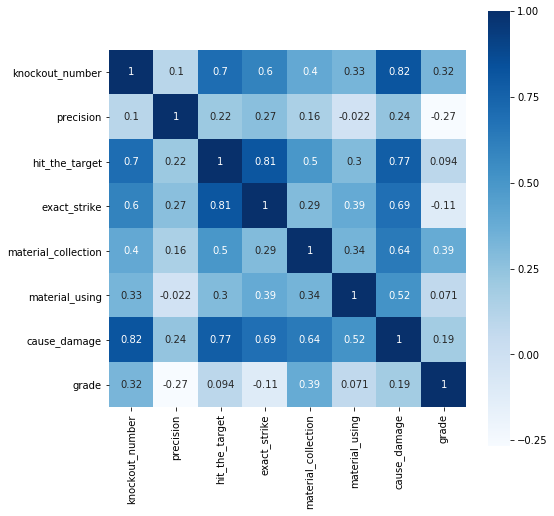

In [72]:
dfData = Fortnite_one.corr()
plt.subplots(figsize=(8, 8)) # 设置画面大小
sns.heatmap(dfData, annot=True, vmax=1, square=True, cmap="Blues")
plt.show()

### 分析与结论
- 在热力图中，与吃鸡（grade）相关性比较高的前三项是：材料收集、淘汰人数和造成伤害
- 之前比较看好的命中和精准打击相关性不太高，难道良好的FPS手感在堡垒之夜中已经不太重要了么，这就还需要更多的数据来研究。

### 期望研究问题 
#### 是否天命圈与能否吃鸡是不是有相关性？（marching_course<2000）
#### 比赛中使用更多的板子与能否吃鸡是不是有相关性？（material_using）

- 由于数据量太小，以后能收集到更多的数据，是希望可以对上面以及更多的方向进行研究哒、

<a id='conclusions'></a>
## 结论
### 根据上面热力图可以得出如下调查结果

- 与吃鸡相关性比较高的前三项是：材料收集、淘汰人数和造成伤害，基本复合预期；  

- 材料使用的相关性高是因为被淘汰的玩家爆出的装备和材料被捡起也视作材料收集；  

- 组队如果想要取得好成绩，围绕1到2个输出位，配置1到2为抗住伤害的肉盾和负责拆板子的机枪手，才是正道；  

- 正如前面所说，这个分析出来的结果更偏向于单人吃鸡，组队吃鸡，队员之间的工作分配也是非常重要的。

>最后想说的是，这样研究报告肯定存在很多的局限性，首先数据量实在太小，其次这个样本很难代表总体，因为大家的水平比较相近，很难代表了总体的高低不等的水平。  
  
>也许还有很多有意思的研究方向，后面我会继续录入数据，继续研究下去哒，